In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv("C:/Users/onkar/Downloads/4_may_prj/Decision Tree Project8/Decision Tree  - Assignment -4/iphone_purchase_records.csv")
data.head(5)

Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

In [4]:
df = data.copy()
df.head()

Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000

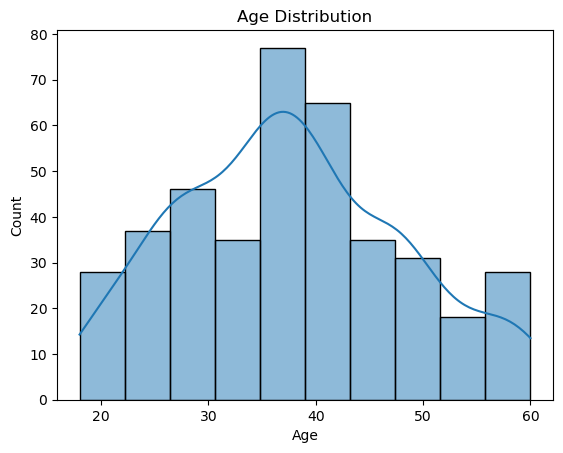

In [9]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.savefig('graphs/age_distributionPRJ8.png')
plt.show()

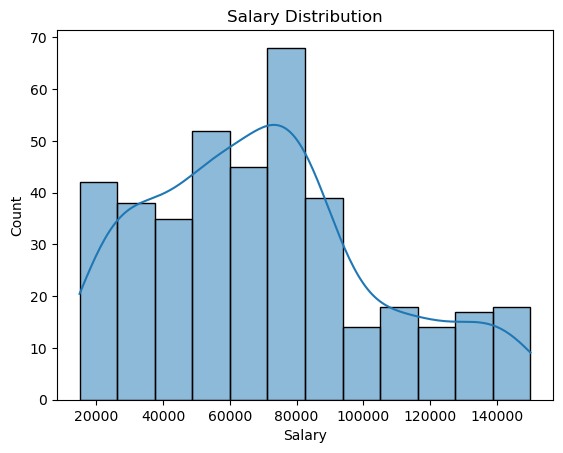

In [10]:
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.savefig('graphs/salary_distributionPRJ8.png')
plt.show()

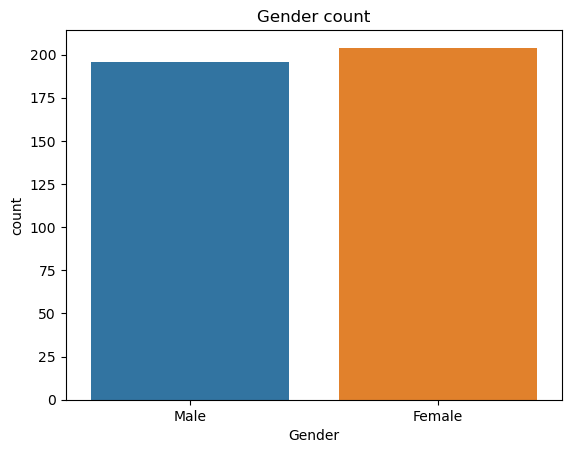

In [13]:
sns.countplot(x = 'Gender', data =df)
plt.title('Gender count')
plt.savefig('graphs/gender_countPRJ8.png')
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


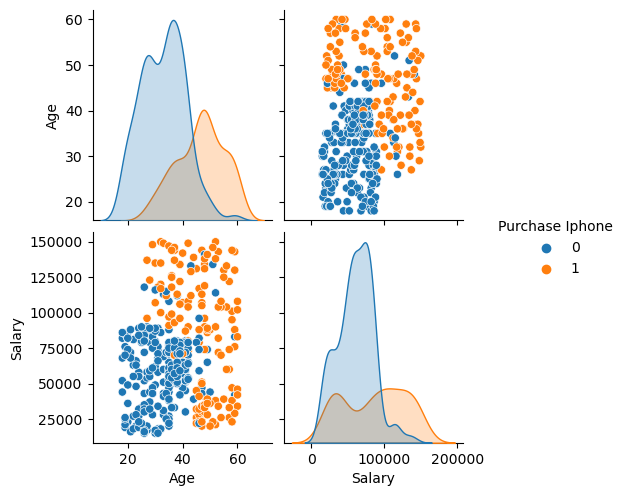

In [14]:
sns.pairplot(df,hue = 'Purchase Iphone')
plt.savefig('graphs/pairplotPRJ8.png')
plt.show()

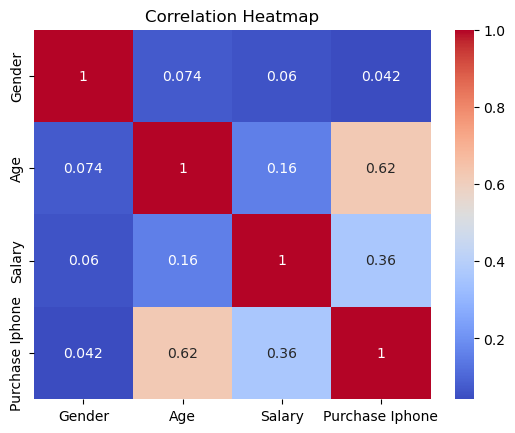

In [16]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('graphs/correlation_heatmapPRJ8.png')
plt.show()

In [17]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
X = df[['Age','Gender','Salary']]
y = df['Purchase Iphone']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = DecisionTreeClassifier(random_state=42)

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
pred = model.predict(X_test_scaled)

C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
accuracy = accuracy_score(y_test,pred)
print("Accuracy Score:",accuracy)
print("Classification Report:\n",classification_report(y_test,pred))
print("Confusion Matrix", confusion_matrix(y_test,pred))

Accuracy Score: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Confusion Matrix [[52  0]
 [28  0]]


C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


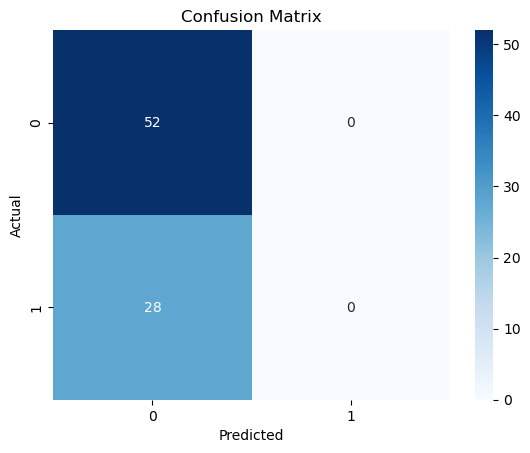

In [42]:

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('graphs/confusion_matrix.png')
plt.show()